In [100]:
##importing libraries##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
data_set= pd.read_csv("/content/fraud_dataset.csv")
data_set.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0


In [102]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    827 non-null    int64
 1   Married                   827 non-null    int64
 2   Dependents                827 non-null    int64
 3   Education                 827 non-null    int64
 4   Self_Employed             827 non-null    int64
 5   ApplicantIncome           827 non-null    int64
 6   CoapplicantIncome         827 non-null    int64
 7   LoanAmount                827 non-null    int64
 8   Loan_Term                 827 non-null    int64
 9   Credit_History_Available  827 non-null    int64
 10  Housing                   827 non-null    int64
 11  Locality                  827 non-null    int64
 12  Fraud_Risk                827 non-null    int64
dtypes: int64(13)
memory usage: 84.1 KB


In [103]:
data_set.isna().sum()

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Term                   0
Credit_History_Available    0
Housing                     0
Locality                    0
Fraud_Risk                  0
dtype: int64

Exploratory Data Analysis:
We can observe that there are no missing values and no duplicates. We can do detailed analysis of each attribute to understand the data better.


In [104]:
count_fraud = len(data_set[data_set['Fraud_Risk']==0])
count_non_fraud = len(data_set[data_set['Fraud_Risk']==1])
pct_of_non_fraud = count_non_fraud/(count_non_fraud +count_fraud)
print("percentage of non Fraud Risk is", round(pct_of_non_fraud*100,2))
pct_of_fraud = count_fraud/(count_non_fraud +count_fraud)
print("percentage of Fraud Risk", round(pct_of_fraud*100,2))

percentage of non Fraud Risk is 57.68
percentage of Fraud Risk 42.32


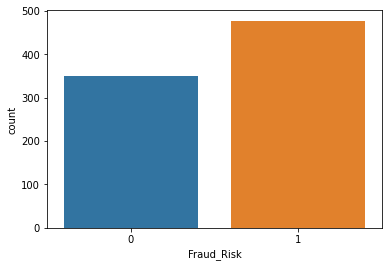

In [106]:

sns.countplot(x='Fraud_Risk',data=data_set)
plt.show()

In [107]:
data_set.groupby('Fraud_Risk').mean()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality
Fraud_Risk,,,,,,,,,,,,
0,0.574286,0.000000,0.308571,0.808571,0.177143,4779.974286,1092.642857,125.611429,346.685714,0.974286,0.700000,2.005714
1,0.851153,0.834382,0.905660,0.777778,0.865828,5530.683438,1774.714885,152.104822,331.849057,0.819706,0.620545,1.958071


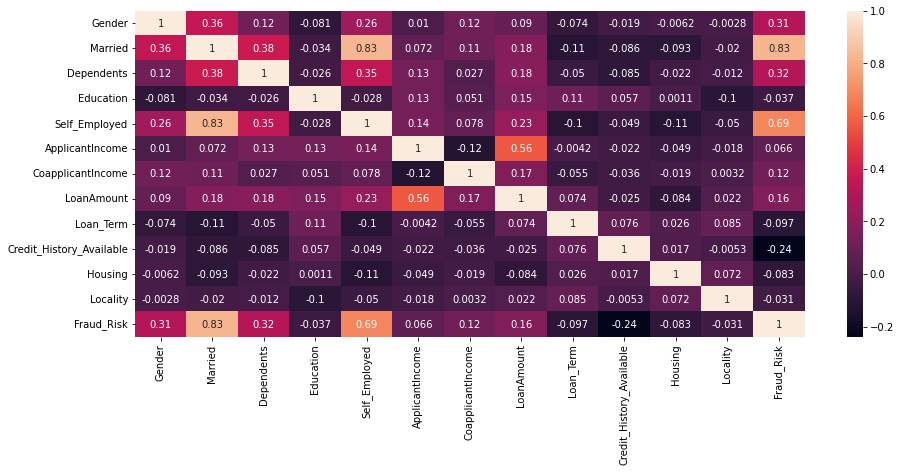

In [108]:
plt.figure(figsize=(15,6))
sns.heatmap(data_set.corr(method ='pearson'),annot=True )

In [109]:
data_set.corr()['Fraud_Risk']

Gender                      0.309570
Married                     0.825064
Dependents                  0.315421
Education                  -0.037406
Self_Employed               0.688170
ApplicantIncome             0.066347
CoapplicantIncome           0.120304
LoanAmount                  0.164087
Loan_Term                  -0.097339
Credit_History_Available   -0.239512
Housing                    -0.082534
Locality                   -0.030530
Fraud_Risk                  1.000000
Name: Fraud_Risk, dtype: float64

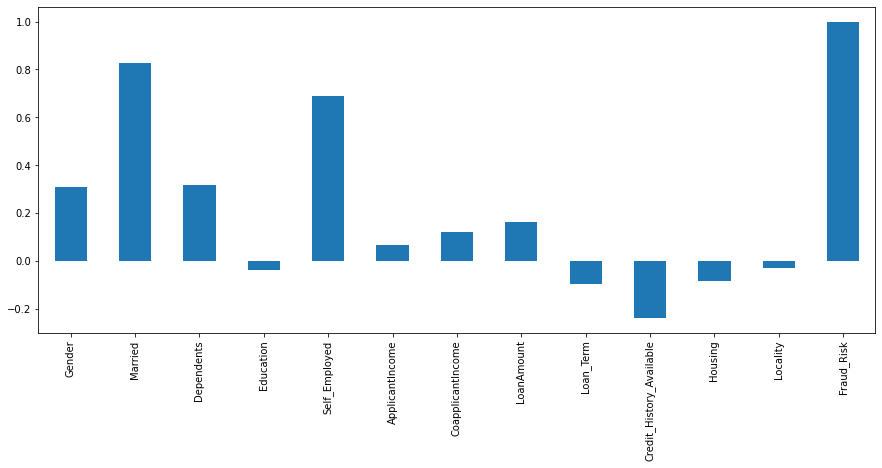

In [110]:
plt.figure(figsize=(15,6))
data_set.corr()['Fraud_Risk'].plot(kind = 'bar')
plt.show()

In [111]:
##We can observe strong positive co-relation between the attributes Married & Self Employed to the target variable which is Fraud Risk
#Select input and target variables
x = data_set[data_set.columns[0:12]]
y = data_set[data_set.columns[12]]

In [112]:
print(x.shape)
print(y.shape)

(827, 12)
(827,)


In [113]:
#Splitting the data with 70:30 mix
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [114]:
print("Train_x Shape :: ", x_train.shape)
print("Train_y Shape :: ", y_train.shape)
print("Test_x Shape :: ", x_test.shape)
print("Test_y Shape :: ", y_test.shape)

Train_x Shape ::  (578, 12)
Train_y Shape ::  (578,)
Test_x Shape ::  (249, 12)
Test_y Shape ::  (249,)


In [116]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x_train)

array([[ 0.60266703, -0.97944986, -0.72775888, ...,  0.36209869,
         0.7469615 ,  1.37422848],
       [ 0.60266703,  1.02098131, -0.72775888, ..., -2.76167805,
         0.7469615 ,  1.37422848],
       [-1.65929104, -0.97944986,  0.3508171 , ...,  0.36209869,
         0.7469615 , -1.24291834],
       ...,
       [-1.65929104, -0.97944986, -0.72775888, ...,  0.36209869,
         0.7469615 ,  0.06565507],
       [-1.65929104,  1.02098131, -0.72775888, ...,  0.36209869,
        -1.33875708,  0.06565507],
       [-1.65929104, -0.97944986,  0.3508171 , ...,  0.36209869,
         0.7469615 ,  1.37422848]])

In [117]:
#applying svc
from sklearn.svm import SVC
model= SVC()
model.fit(x_train,y_train)

SVC()

In [118]:
train_predict_SVC= model.predict(x_train)
test_predict_SVC=model.predict(x_test)

In [119]:
Score_SVC_train=model.score(x_train,y_train)
Score_SVC_test=model.score(x_test,y_test)
print(Score_SVC_train)
print(Score_SVC_test)

0.657439446366782
0.6104417670682731


In [120]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [121]:
test_pred_knn=knn.predict(x_test)
train_pred_knn=knn.predict(x_train)

In [122]:
Score_KNN_train=knn.score(x_train,y_train)
Score_KNN_test=knn.score(x_test,y_test)
print(Score_KNN_train)
print(Score_KNN_test)

0.8027681660899654
0.6586345381526104


In [123]:
##decision tree##

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [124]:
train_DT_predict= clf.predict(x_train)
test_DT_predict=clf.predict(x_test)

In [125]:
Score_DT_train=clf.score(x_train,y_train)
Score_DT_test=clf.score(x_test,y_test)
print(Score_DT_train)
print(Score_DT_test)

1.0
0.9036144578313253


In [126]:
##randomforest
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [127]:
train_predict_rfc= rfc.predict(x_train)
test_predict_rfc=rfc.predict(x_test)

In [128]:
Score_RFC_train=rfc.score(x_train,y_train)
Score_RFC_test=rfc.score(x_test,y_test)
print(Score_RFC_train)
print(Score_RFC_test)

1.0
0.9477911646586346


In [129]:

# Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=50)
lg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=50)

In [130]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [131]:
Score_LR_train=lg.score(x_train,y_train)
Score_LR_test=lg.score(x_test,y_test)
print(Score_LR_train)
print(Score_LR_test)

0.8996539792387543
0.8634538152610441


In [133]:
from pandas.core.frame import DataFrame
Model_Comparison = DataFrame({
    'Model' : ['Logistic Regression','SVM','KNN','Decision Tree','Random Forest'],
    'Scores_test': [Score_LR_test*100,Score_SVC_test*100,Score_KNN_test*100,Score_DT_test*100,Score_RFC_test*100],
    'Scores_train': [Score_LR_train*100,Score_SVC_train*100,Score_KNN_train*100,Score_DT_train*100,Score_RFC_train*100]
    })
Model_Comparison

,Model,Scores_test,Scores_train
0,Logistic Regression,86.345382,89.965398
1,SVM,61.044177,65.743945
2,KNN,65.863454,80.276817
3,Decision Tree,90.361446,100.000000
4,Random Forest,94.779116,100.000000


In [134]:
Model_Comparison_df = Model_Comparison.sort_values(by= 'Scores_test', ascending=False)
Model_Comparison_df.reset_index()[Model_Comparison_df.columns]

,Model,Scores_test,Scores_train
0,Random Forest,94.779116,100.000000
1,Decision Tree,90.361446,100.000000
2,Logistic Regression,86.345382,89.965398
3,KNN,65.863454,80.276817
4,SVM,61.044177,65.743945


In [138]:
##conclusion##
#Based on above results we can say that Random Forest gives the best score. Hence we will use that.
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

In [136]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       110
           1       1.00      0.91      0.95       139

    accuracy                           0.95       249
   macro avg       0.95      0.95      0.95       249
weighted avg       0.95      0.95      0.95       249



In [137]:
from sklearn.metrics import confusion_matrix
conf_matix = confusion_matrix(y_test,y_test_pred)
conf_matix

array([[110,   0],
       [ 13, 126]])